<a href="https://colab.research.google.com/github/anakindinger/IAA007-VisualizacaoDadosStorytelling/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# prompt: carregue as bibliotecas necessárias para uma exploração de dados e storytelling com gráficos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração padrão para melhor visualização
#plt.style.use('seaborn-whitegrid')  # Estilo de gráfico
#plt.rcParams['figure.figsize'] = (10, 6)  # Tamanho padrão da figura


In [41]:
salarios_minimos = pd.read_csv('/content/Salários mínimos.csv')

salarios_medios = pd.read_csv('/content/Salarios_medios.csv')

carros = pd.read_csv('/content/precos_carros_brasil.csv')

<ipython-input-41-a3408c5dda51>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  carros = pd.read_csv('/content/precos_carros_brasil.csv')


In [42]:
# Visualizando as primeiras linhas do DataFrame 'carros'
print(carros.head())

#Visualizando as primeiras linas do dataframe 'salarios_minimos'
print(salarios_minimos.head())

#Visualizando as primeiras linas do dataframe 'salarios_medios'
print(salarios_medios.head())

   year_of_reference month_of_reference fipe_code authentication  \
0             2021.0            January  004001-0   cfzlctzfwrcp   
1             2021.0            January  004001-0   cdqwxwpw3y2p   
2             2021.0            January  004001-0   cb1t3xwwj1xp   
3             2021.0            January  004001-0   cb9gct6j65r0   
4             2021.0            January  004003-7   g15wg0gbz1fx   

            brand                                   model      fuel    gear  \
0  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
1  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
2  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
3  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p   Alcohol  manual   
4  GM - Chevrolet  Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI  Gasoline  manual   

  engine_size  year_model  avg_price_brl  
0           1      2002.0         9162.0  
1           1      2001.0     

In [43]:
# Verificando valores nulos em cada coluna
print("Valores nulos:\n ", carros.isnull().sum())

#retirando os valores nulos do dataframe
carros.dropna(how="all", inplace=True)

Valores nulos:
  year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64


In [44]:
# prompt: transfore a coluna month_of_reference em seu correspondente numerico, os meses estão em ingles, tenha certeza que os numeros inseridos no maping estão no formato string, transformar year_of_reference em string sem o .0

# Mapeando os meses para seus valores numéricos correspondentes
month_mapping = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

carros['month_of_reference'] = carros['month_of_reference'].map(month_mapping)

# Convertendo 'year_of_reference' para string e removendo o '.0'
carros['year_of_reference'] = carros['year_of_reference'].astype(int).astype(str)


In [45]:
# prompt: concatene as colunas month_of_reference e year_of_reference para ficar no formado month_of_reference/year_of_reference e tipo de dados de data

# Concatenando as colunas 'month_of_reference' e 'year_of_reference'
# The .astype(int) ensures the month is an integer without the decimal
carros['date'] = carros['month_of_reference'] + '/' + carros['year_of_reference'].astype(str).str.zfill(4)

# Convertendo a coluna 'date' para o tipo datetime
carros['date'] = pd.to_datetime(carros['date'], format='%m/%Y')

print(carros.head())
print(carros.info())

  year_of_reference month_of_reference fipe_code authentication  \
0              2021                 01  004001-0   cfzlctzfwrcp   
1              2021                 01  004001-0   cdqwxwpw3y2p   
2              2021                 01  004001-0   cb1t3xwwj1xp   
3              2021                 01  004001-0   cb9gct6j65r0   
4              2021                 01  004003-7   g15wg0gbz1fx   

            brand                                   model      fuel    gear  \
0  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
1  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
2  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p  Gasoline  manual   
3  GM - Chevrolet            Corsa Wind 1.0 MPFI / EFI 2p   Alcohol  manual   
4  GM - Chevrolet  Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI  Gasoline  manual   

  engine_size  year_model  avg_price_brl       date  
0           1      2002.0         9162.0 2021-01-01  
1           1 

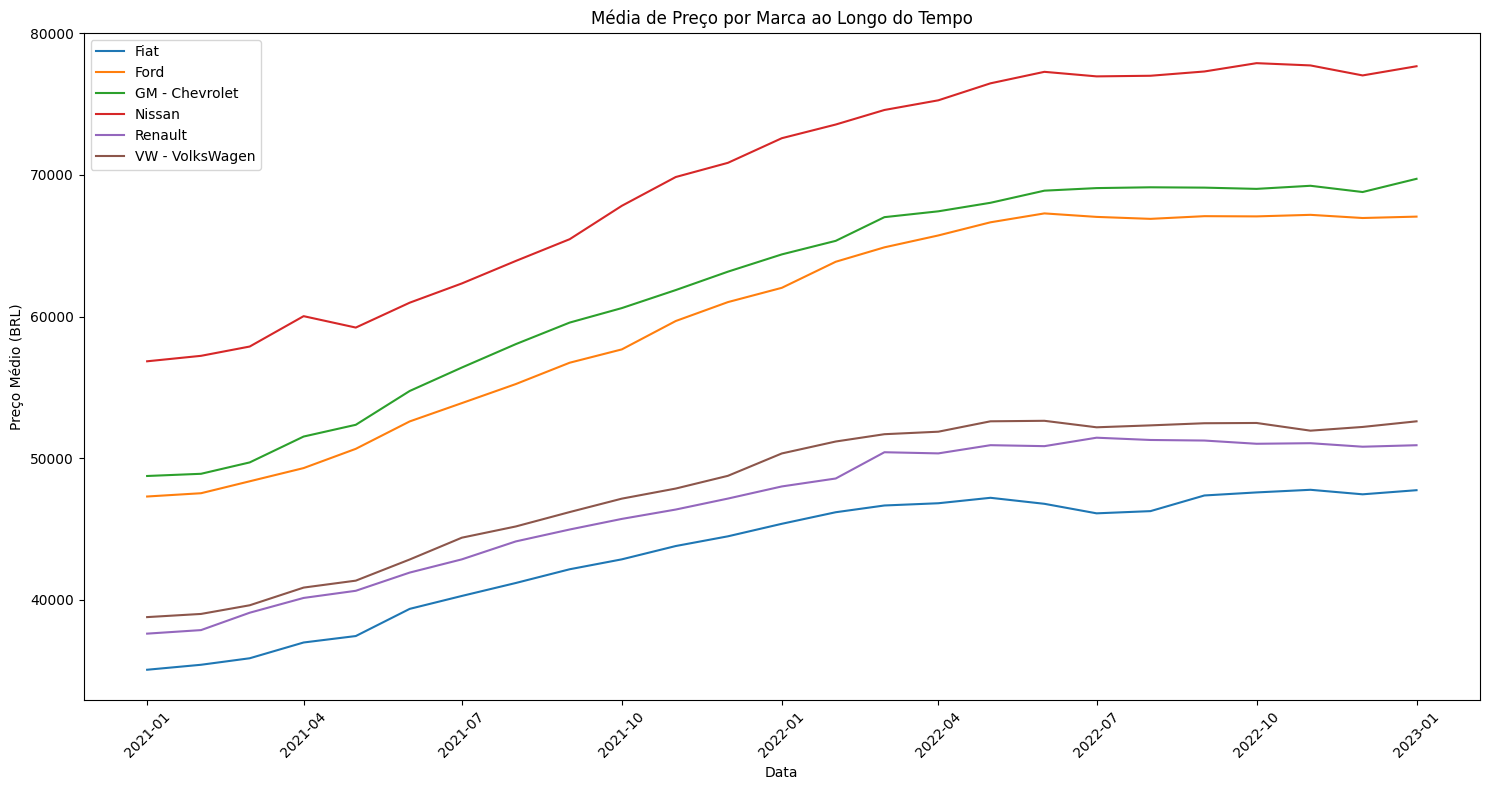

In [46]:
# prompt: faça um gráfico de linhas com a média da coluna avg_price_brl de cada brand e date

# Agrupando por marca e data, calculando a média do preço e plotando
media_preco_marca = carros.groupby(['brand', 'date'])['avg_price_brl'].mean().reset_index()

plt.figure(figsize=(15, 8))  # Ajuste o tamanho da figura conforme necessário

for brand in media_preco_marca['brand'].unique():
    brand_data = media_preco_marca[media_preco_marca['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['avg_price_brl'], label=brand)

plt.xlabel('Data')
plt.ylabel('Preço Médio (BRL)')
plt.title('Média de Preço por Marca ao Longo do Tempo')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend()
plt.tight_layout()
plt.show()


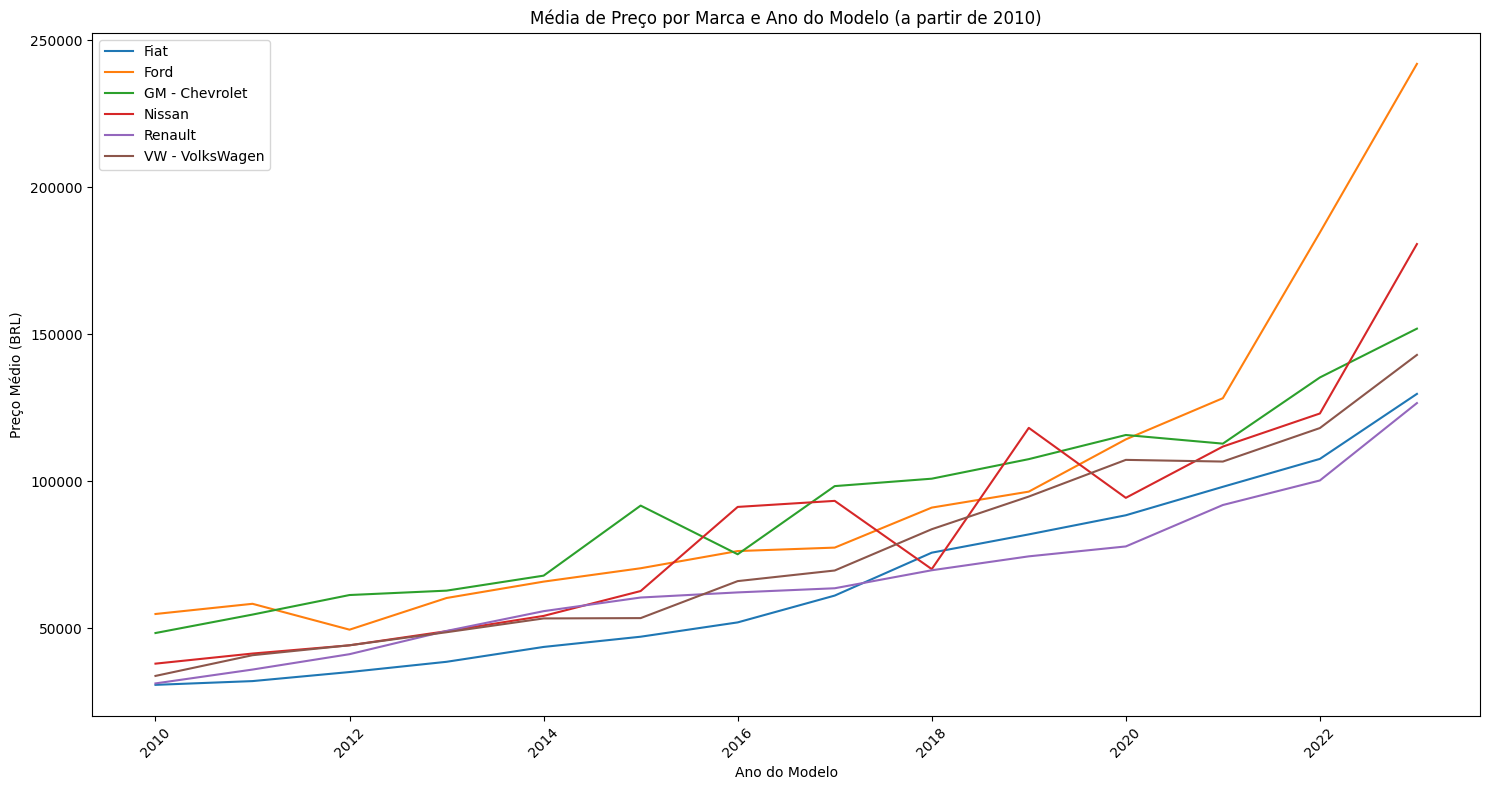

In [47]:
# prompt: faça um gráfico de linhas com a média da coluna avg_price_brl de cada brand e year_model a partir de 2010

# Filtrar dados a partir de 2010
carros_2010 = carros[carros['year_model'] >= 2010]

# Agrupar por marca, ano do modelo e calcular a média do preço
media_preco_marca_ano = carros_2010.groupby(['brand', 'year_model'])['avg_price_brl'].mean().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(15, 8))

for brand in media_preco_marca_ano['brand'].unique():
    brand_data = media_preco_marca_ano[media_preco_marca_ano['brand'] == brand]
    plt.plot(brand_data['year_model'], brand_data['avg_price_brl'], label=brand)

plt.xlabel('Ano do Modelo')
plt.ylabel('Preço Médio (BRL)')
plt.title('Média de Preço por Marca e Ano do Modelo (a partir de 2010)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


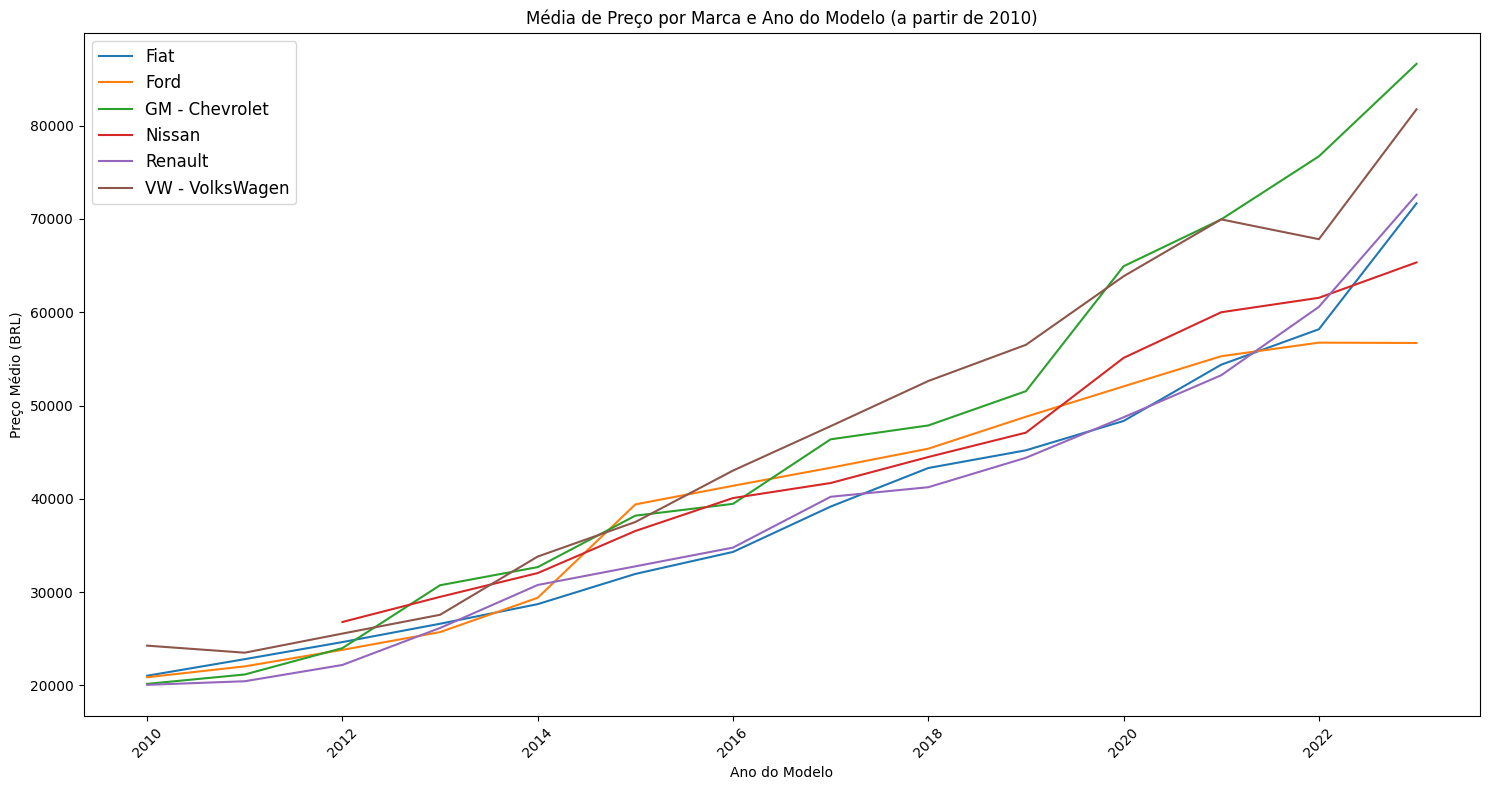

In [48]:
# prompt: faça um gráfico de linhas com a média da coluna avg_price_brl de cada brand e year_model a partir de 2010, desconsiderando os registros com gear diferente de manual e engine_size diferente que 1, deixe a legenda bem grande

# Filtrar dados a partir de 2010, gear igual a manual e engine_size igual a 1
carros_filtrados = carros[(carros['year_model'] >= 2010) & (carros['gear'] == 'manual') & (carros['engine_size'] == '1')]

# Agrupar por marca, ano do modelo e calcular a média do preço
media_preco_marca_ano = carros_filtrados.groupby(['brand', 'year_model'])['avg_price_brl'].mean().reset_index()

# Criar o gráfico de linhas com legenda maior
plt.figure(figsize=(15, 8))

for brand in media_preco_marca_ano['brand'].unique():
    brand_data = media_preco_marca_ano[media_preco_marca_ano['brand'] == brand]
    plt.plot(brand_data['year_model'], brand_data['avg_price_brl'], label=brand)

plt.xlabel('Ano do Modelo')
plt.ylabel('Preço Médio (BRL)')
plt.title('Média de Preço por Marca e Ano do Modelo (a partir de 2010)')
plt.xticks(rotation=45)
plt.legend(fontsize='large') # Aumenta o tamanho da legenda
plt.tight_layout()
plt.show()


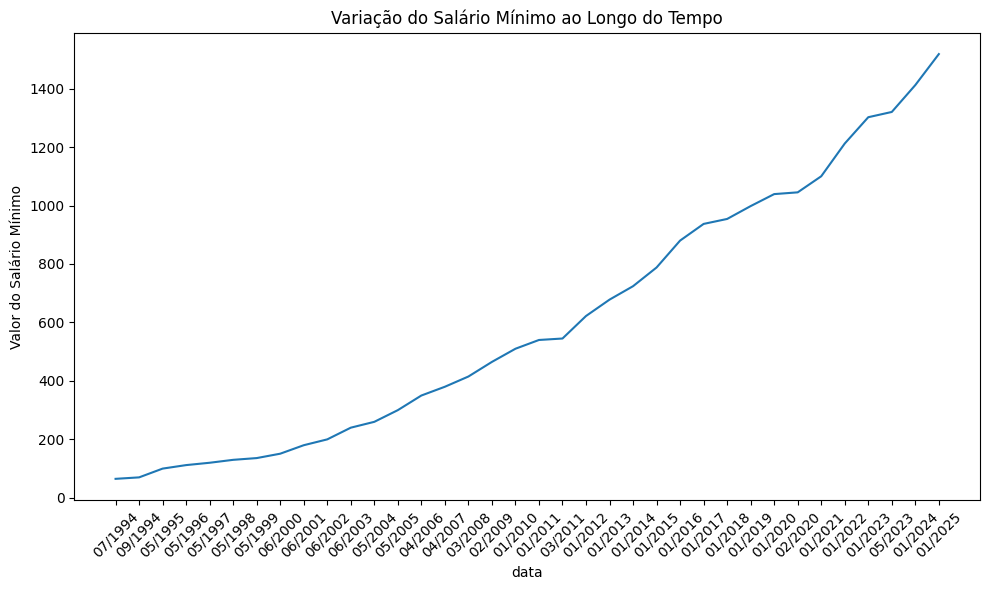

In [49]:
# prompt: plote um grafico de linhas do dataframe salários_mínimos

plt.figure(figsize=(10, 6))
plt.plot(salarios_minimos['data'], salarios_minimos['valor'])
plt.xlabel('data')
plt.ylabel('Valor do Salário Mínimo')
plt.title('Variação do Salário Mínimo ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-50-479ca607df86>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  salarios_medios['data'] = pd.to_datetime(salarios_medios['data'])


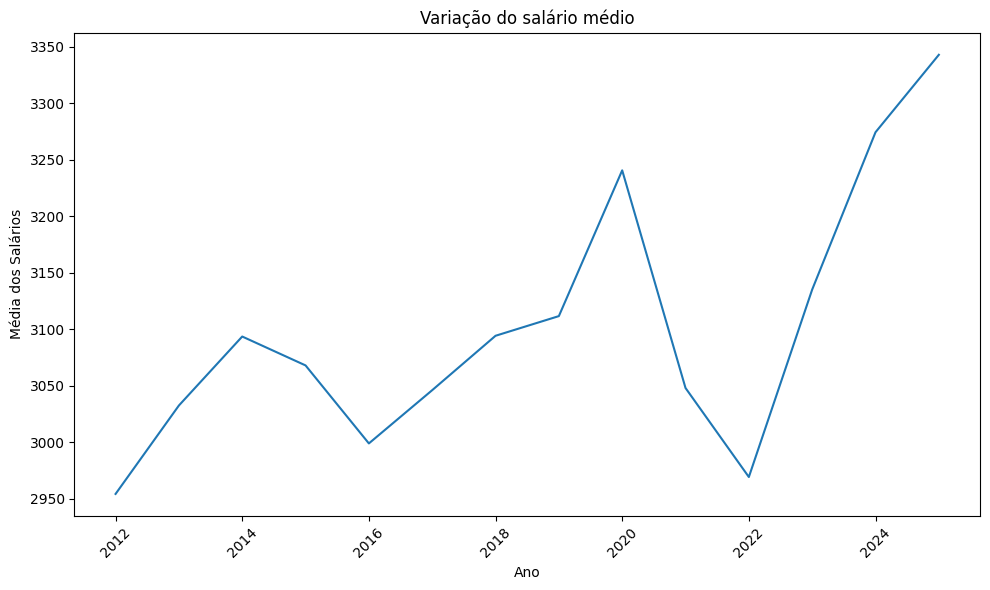

In [50]:
# prompt: plote um grafico com a variação da média de salarios ao longo do tempo agrupando por ano

# Convertendo a coluna 'data' para datetime
salarios_medios['data'] = pd.to_datetime(salarios_medios['data'])

# Criando uma coluna 'Ano' a partir da coluna 'Data'
salarios_medios['ano'] = salarios_medios['data'].dt.year

# Agrupando por ano e calculando a média dos salários
media_salarios_ano = salarios_medios.groupby('ano')['valor'].mean()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(media_salarios_ano.index, media_salarios_ano.values)
plt.xlabel('Ano')
plt.ylabel('Média dos Salários')
plt.title('Variação do salário médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-55-fd29d4f1634f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carros_filtrados['year_model'] = carros_filtrados['year_model'].astype(int)


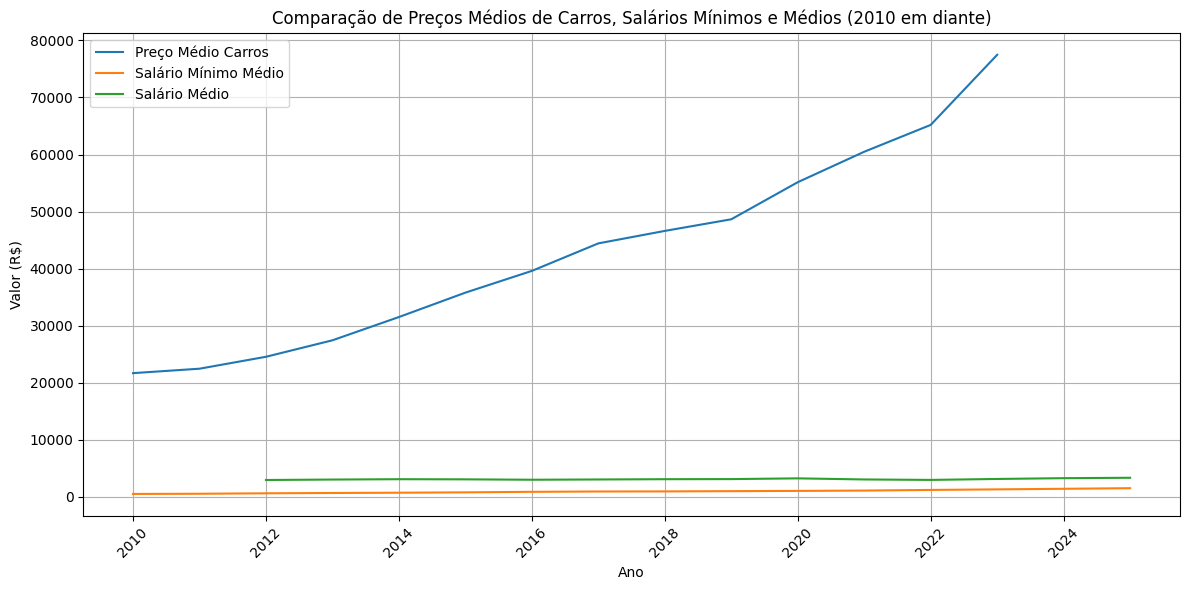

In [55]:
# prompt: faça um grafico comparando a média de preço dos carros_filtrados, salarios minimos e salarios medios por ano desde 2010 sem separar as marcas

# Convertendo a coluna 'data' para datetime (se ainda não estiver)
salarios_minimos['data'] = pd.to_datetime(salarios_minimos['data'])
salarios_minimos['ano'] = salarios_minimos['data'].dt.year

# Filtrando os dados a partir de 2010
salarios_minimos_2010 = salarios_minimos[salarios_minimos['ano'] >= 2010]
salarios_medios_2010 = salarios_medios[salarios_medios['ano'] >= 2010]


# Agrupando e calculando a média do salário mínimo por ano
media_salario_minimo_ano = salarios_minimos_2010.groupby('ano')['valor'].mean()

# Agrupando e calculando a média do salário médio por ano
media_salario_medio_ano = salarios_medios_2010.groupby('ano')['valor'].mean()

# Agrupando os carros filtrados por ano e calculando a média do preço
carros_filtrados['year_model'] = carros_filtrados['year_model'].astype(int)
media_preco_carros_ano = carros_filtrados.groupby('year_model')['avg_price_brl'].mean()

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(media_preco_carros_ano.index, media_preco_carros_ano.values, label='Preço Médio Carros')
plt.plot(media_salario_minimo_ano.index, media_salario_minimo_ano.values, label='Salário Mínimo Médio')
plt.plot(media_salario_medio_ano.index, media_salario_medio_ano.values, label='Salário Médio')

plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.title('Comparação de Preços Médios de Carros, Salários Mínimos e Médios (2010 em diante)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-53-34a26388b2e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carros_filtrados['ano'] = carros_filtrados['year_model']


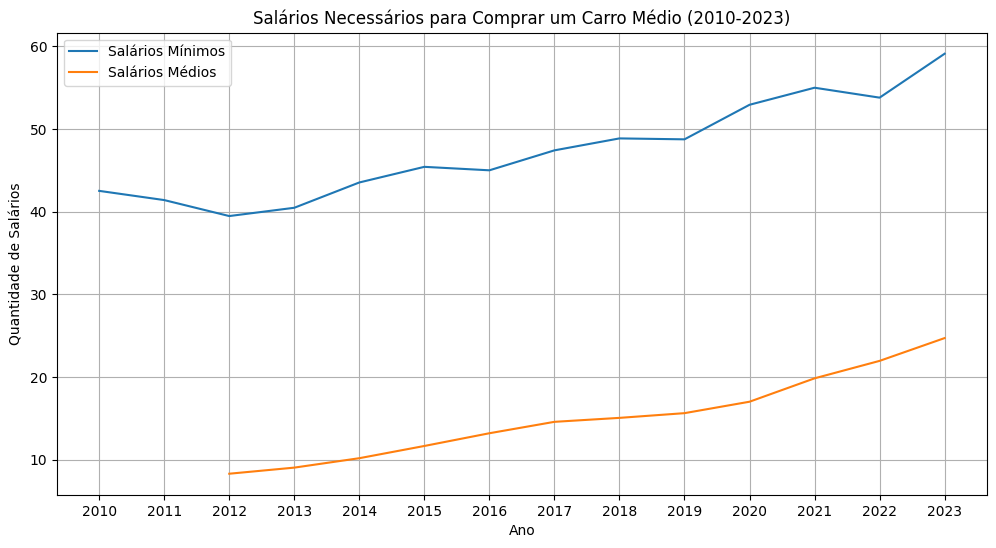

In [53]:
# prompt: gere um gráfico evidenciando quantos salários minimos e quantos salarios médios são necessários para comprar um carro de preço medio a cada ano desde 2010, nem todos os dataframes tem os mesmos anos, para os dados dos carros use o df carros_filtrados das celulas anteriores

# Convertendo as colunas de data para datetime
salarios_minimos['data'] = pd.to_datetime(salarios_minimos['data'])
salarios_medios['data'] = pd.to_datetime(salarios_medios['data'])
#carros_filtrados['data'] = pd.to_datetime(carros_filtrados['year_model'])

# Criando colunas de ano para os DataFrames
salarios_minimos['ano'] = salarios_minimos['data'].dt.year
salarios_medios['ano'] = salarios_medios['data'].dt.year
carros_filtrados['ano'] = carros_filtrados['year_model']

# Calculando a média anual dos preços dos carros
preco_medio_carro_ano = carros_filtrados.groupby('ano')['avg_price_brl'].mean()


# Criando um DataFrame para armazenar os resultados
df_comparacao = pd.DataFrame()
df_comparacao['ano'] = preco_medio_carro_ano.index

# Juntando os dados dos salários mínimos e médios
df_comparacao = pd.merge(df_comparacao, salarios_minimos.groupby('ano')['valor'].mean(), on='ano', how='left')
df_comparacao = pd.merge(df_comparacao, salarios_medios.groupby('ano')['valor'].mean(), on='ano', how='left')
df_comparacao = pd.merge(df_comparacao, preco_medio_carro_ano, on='ano', how='left')

# Renomeando as colunas
df_comparacao = df_comparacao.rename(columns={
    'valor_x': 'salario_minimo',
    'valor_y': 'salario_medio',
    'avg_price_brl': 'preco_medio_carro'
})


# Calculando a quantidade de salários mínimos e médios para comprar um carro
df_comparacao['salarios_minimos_carro'] = df_comparacao['preco_medio_carro'] / df_comparacao['salario_minimo']
df_comparacao['salarios_medios_carro'] = df_comparacao['preco_medio_carro'] / df_comparacao['salario_medio']

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_comparacao['ano'], df_comparacao['salarios_minimos_carro'], label='Salários Mínimos')
plt.plot(df_comparacao['ano'], df_comparacao['salarios_medios_carro'], label='Salários Médios')

plt.xlabel('Ano')
plt.ylabel('Quantidade de Salários')
plt.title('Salários Necessários para Comprar um Carro Médio (2010-2023)')
plt.legend()
plt.grid(True)
plt.xticks(df_comparacao['ano'])
plt.show()
